### Topic visialization

In [36]:
import numpy as np
import pandas as pd
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
# load model
data_label = 'html_clean'
model_path = f'data/{data_label}/kmeans_model.pkl'

with open(model_path, 'rb') as file:
    kmeans_model = pickle.load(file)

In [22]:
# load data
embeddings = np.load(f'data/embedding_{data_label}.npy')
index_embeddings = np.load(f'data/index_embedding_{data_label}.npy')
df = pd.read_csv(f'data/html_clean.csv', index_col=0)

In [31]:
text_entries = df.loc[index_embeddings, 'body'].values

In [38]:
cluster_data = {}

cluster_labels = kmeans_model.labels_

for i, label in enumerate(cluster_labels):
    if label not in cluster_data:
        cluster_data[label] = []
    cluster_data[label].append(text_entries[i])

cluster_data = {
    label: np.array(data) for label, data in cluster_data.items()
}


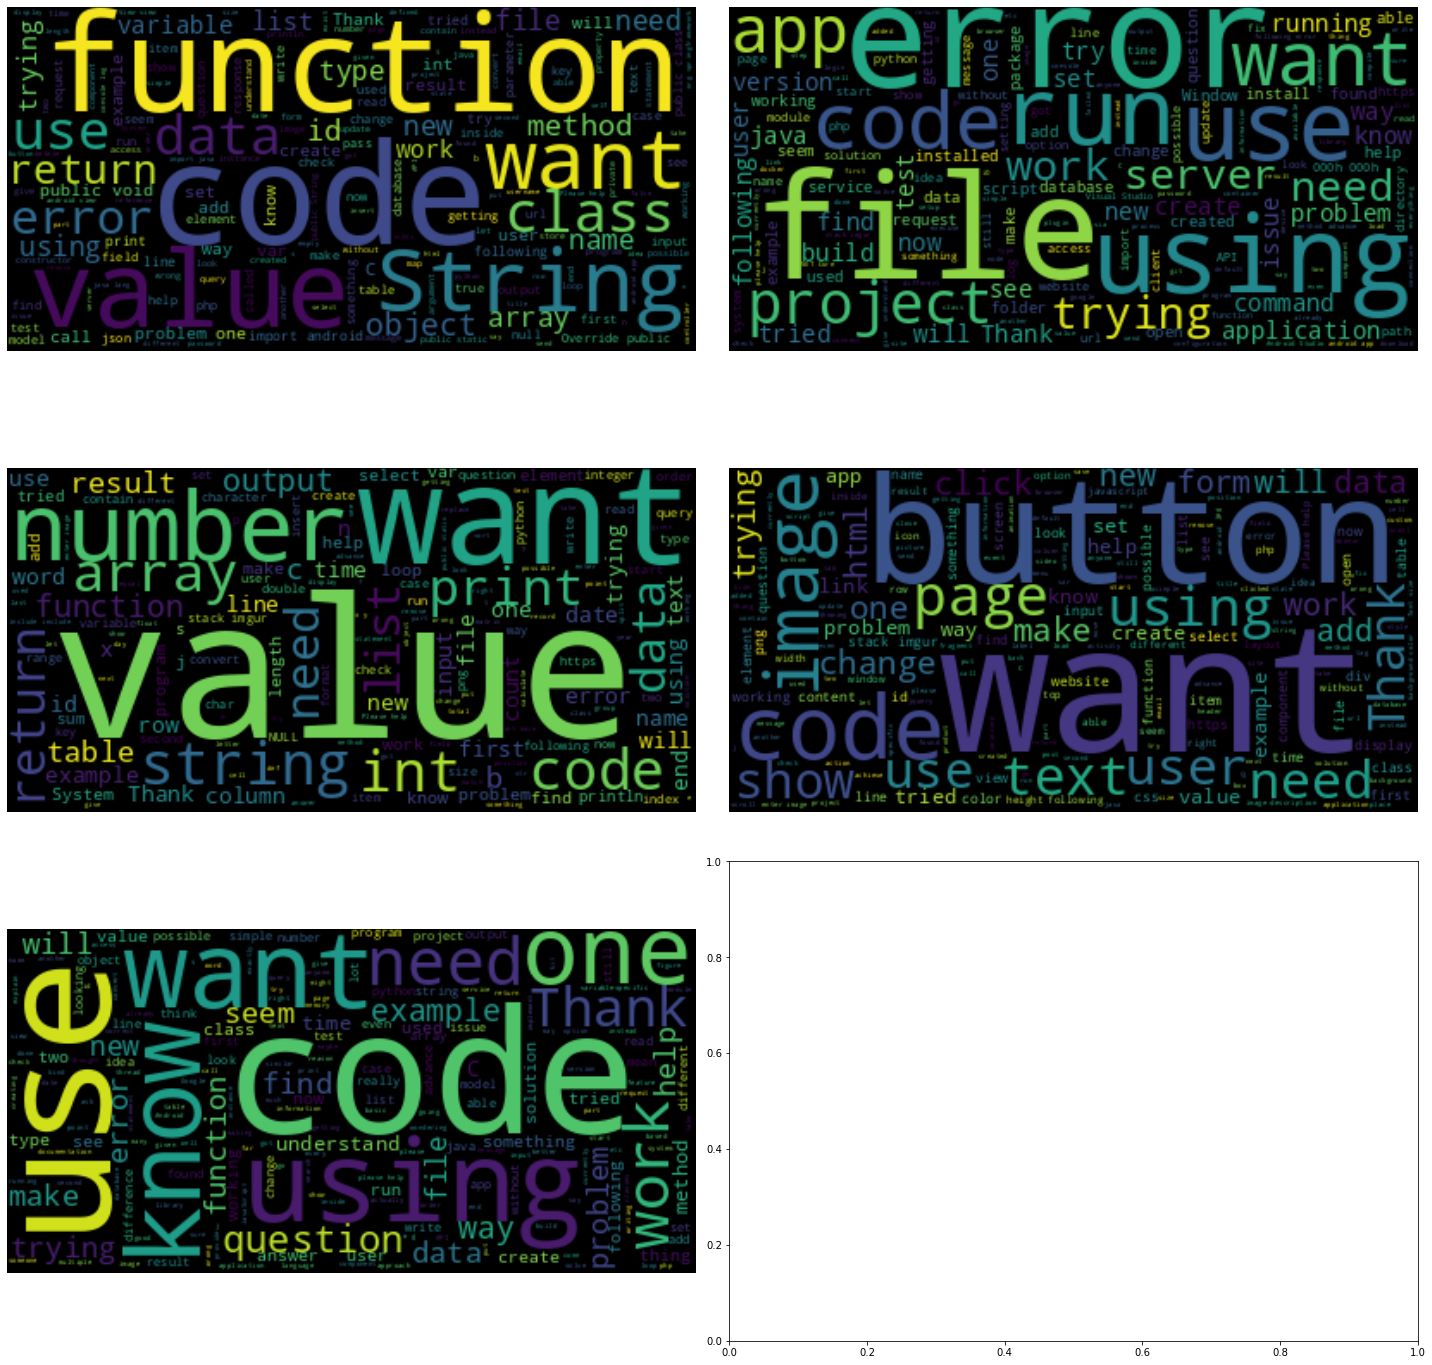

In [39]:
n_unique_labels = len(set(cluster_labels))
n_rows = n_unique_labels // 2 + 1

fig, axs = plt.subplots(n_rows, 2, figsize=(20, 20))

# Iterate over unique cluster labels
for i, cluster_label in enumerate(set(cluster_labels)):
    # Get the text entries for the current cluster
    cluster_text_entries = text_entries[cluster_labels == cluster_label]

    # Concatenate the text entries into a single string
    cluster_text = ' '.join(cluster_text_entries)

    # Generate the word cloud
    wordcloud = WordCloud().generate(cluster_text)

    # Display the word cloud in the corresponding subplot
    row_idx = i // 2
    col_idx = i % 2
    axs[row_idx, col_idx].imshow(wordcloud, interpolation='bilinear')
    axs[row_idx, col_idx].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()
